<a href="https://colab.research.google.com/github/rubengamarro/practicas-aprendizaje-supervisado/blob/main/Tarea_Evaluacion_de_modelos_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO 1

**Apartado a**

In [182]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/ionosphere.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [183]:
#Preprocesamos los datos
X = df.loc[:, :33].values
y = df.loc[:, 34].values

In [184]:
#Codificamos las clases
from sklearn.preprocessing import LabelEncoder
mapeador_clase = LabelEncoder()
y = mapeador_clase.fit_transform(y)
np.unique(y)

array([0, 1])

In [185]:
from sklearn.model_selection import train_test_split

X_ent, X_test, y_ent, y_test = train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=10)

In [186]:
#Estandarizamos las muestras
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_ent = escalador.fit_transform(X_ent)
X_test = escalador.transform(X_test)

**Apartado b**

In [187]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(random_state=1, solver='lbfgs', max_iter=200)
reg_log.fit(X_ent, y_ent)

LogisticRegression(max_iter=200, random_state=1)

In [188]:
#Definimos los tamaños de entrenamiento a evaluar
train_sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [189]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
tamaños_conjEnt, rendimientos_ent, rendimientos_test =\
                learning_curve(estimator=reg_log,
                               X=X,
                               y=y,
                               train_sizes=train_sizes,
                               cv=12,
                               n_jobs=1)

In [190]:
#Calculamos medias y desviaciones típicas de rendimiento para cada pliegue:
media_ent = np.mean(rendimientos_ent, axis=1)
desvT_ent = np.std(rendimientos_ent, axis=1)
media_test = np.mean(rendimientos_test, axis=1)
desvT_test = np.std(rendimientos_test, axis=1)

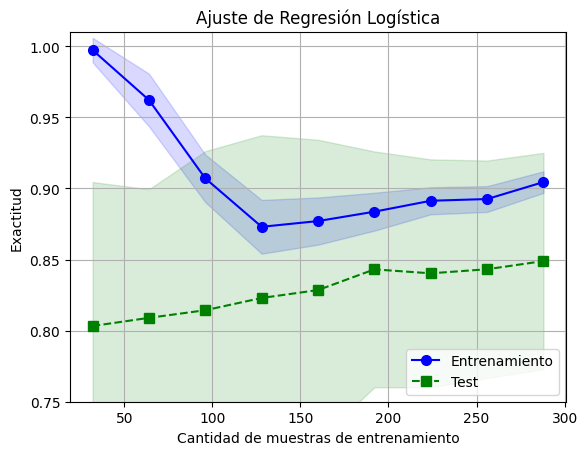

In [191]:
# Dibujamos rendimientos medios en función del tamaño del conjunto de
# entrenamiento:
plt.plot(tamaños_conjEnt, media_ent,
         color='blue', marker='o',
         markersize=7, label='Entrenamiento')
plt.plot(tamaños_conjEnt, media_test,
         color='green', linestyle='--',
         marker='s', markersize=7,
         label='Test')

# Pintamos desviaciones típicas:
plt.fill_between(tamaños_conjEnt,
                 media_ent + desvT_ent,
                 media_ent - desvT_ent,
                 alpha=0.15, color='blue')
plt.fill_between(tamaños_conjEnt,
                 media_test + desvT_test,
                 media_test - desvT_test,
                 alpha=0.15, color='green')

# Pintamos leyendas, etiquetas, ...:
plt.grid()
plt.title('Ajuste de Regresión Logística')
plt.xlabel('Cantidad de muestras de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(loc='lower right')
plt.ylim([0.75, 1.01])
plt.show()

Como podemos ver en la curva de aprendizaje, la mejor configuración se consigue considerando entre el 60% y el 90% de muestras en entrenamiento. Del 60% al 90% aumenta un poco la exactitud en test y entrenamiento, pero ya queda a nuestro criterio si aumentar este porcentaje o no, ya que aumentaría el costo computacional.

Respecto al sobreajuste, podemos ver como se produce sobreajuste cuando tomamos un porcentaje pequeño de muestras de entrenamiento (10%-20%), ya que la exactitud en test es relativamente baja mientras que en entrenamiento es perfecta o casi perfecta. Esto se debe a que al tomar tan pocas muestras de entrenamiento el modelo de se ajusta demasiado a los pocos datos disponibles y no generaliza bien.

No parece haber subajuste, ya que las exactitudes son altas tanto en entrenamiento como test.

**Apartado c**

In [192]:
# Mostramos el nombre de los parámetros por los que ajustar en el estimador que
# vayamos a usar:

reg_log.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [193]:
from sklearn.model_selection import validation_curve

# Probaremos 16 valores de C, desde 10^-5 hasta 1
rango_param = np.logspace(-5, 0, 16)
rendimientos_ent, rendimientos_test = validation_curve(
                            reg_log,
                            X=X,
                            y=y,
                            param_name='C', #Sin pipe: param_name='gamma'
                            param_range=rango_param,
                            cv=10)

In [194]:
media_ent = np.mean(rendimientos_ent, axis=1)
desvT_ent = np.std(rendimientos_ent, axis=1)
media_test = np.mean(rendimientos_test, axis=1)
desvT_test = np.std(rendimientos_test, axis=1)

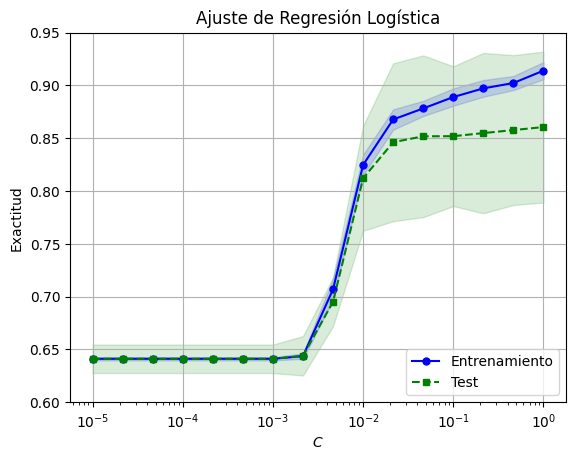

In [195]:
plt.plot(rango_param, media_ent,
         color='blue', marker='o',
         markersize=5, label='Entrenamiento')
plt.fill_between(rango_param, media_ent + desvT_ent,
                 media_ent - desvT_ent, alpha=0.15,
                 color='blue')
plt.plot(rango_param, media_test,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Test')
plt.fill_between(rango_param,
                 media_test + desvT_test,
                 media_test - desvT_test,
                 alpha=0.15, color='green')
plt.grid()

plt.legend(loc='lower right')
plt.xlabel(r"$C$")
plt.ylabel('Exactitud')
plt.title('Ajuste de Regresión Logística')
plt.xscale('log')
plt.ylim([0.6, 0.95])
plt.show()

Como podemos ver en la curva de validación, la mejor configuración para C se encuentra a partir del valor 10^{-15} hasta 1. Al igual que antes queda a criterio de cada uno aumentar el valor de C, ya que como podemos ver a partir de este valor el aumento de la exactitud en test es casi despreciable. Además, para valores más altos de C podría haber sobreajuste.

Para los valores de C que hemos estudiado no hay sobreajuste, pero si aumentaramos el valor de C seguramente habría sobreajuste, ya que la exactitud en entrenamiento sería casi perfecta mientras que la exactitud del test disminuiría considerablemente.

Podemos ver como para los valores muy bajos de C, la exactitud tanto en entrenamiento como test es baja, lo que indica un claro subajuste. Esto se debe a que un valor tan bajo de C indica más regularización, lo que significa que el modelo será más simple y generalizará tanto que no se ajustará bien a los datos, provocando subajuste.

#EJERCICIO 2

**Apartado a**

In [196]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/ionosphere.csv", header=None)

In [197]:
#Preprocesamos los datos
X = df.loc[:, :33].values
y = df.loc[:, 34].values

In [198]:
#Codificamos las clases
from sklearn.preprocessing import LabelEncoder
mapeador_clase = LabelEncoder()
y = mapeador_clase.fit_transform(y)
np.unique(y)

array([0, 1])

In [199]:
from sklearn.model_selection import train_test_split

X_ent, X_test, y_ent, y_test = train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=10)

In [200]:
#Estandarizamos las muestras
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_ent_std = escalador.fit_transform(X_ent)
X_test_std = escalador.transform(X_test)

Para ver que modelo es mejor para este problema, utilizaremos la validación cruzada anidada.

Rendimiento de la regresión logística:

In [201]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', max_iter=200)
reg_log.fit(X_ent_std, y_ent)

LogisticRegression(max_iter=200, random_state=1)

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Bucle interno:
busqRejillaRL = GridSearchCV(estimator=reg_log,
                  param_grid=[{'C': [0.001, 0.01, 0.1, 1.0,
                                                         10.0, 100.0]}],
                  scoring='accuracy',
                  cv=2)

# Bucle externo:
redimientosRL = cross_val_score(busqRejillaRL, X, y,
                         scoring='accuracy', cv=10)
print('Exactitud RL: %.3f +/- %.3f' % (np.mean(redimientosRL),
                                      np.std(redimientosRL)))

Exactitud RL: 0.846 +/- 0.067


Rendimiento del KNN:

In [203]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_ent_std, y_ent)

KNeighborsClassifier()

In [204]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [205]:
# Bucle interno:
busqRejilla = GridSearchCV(estimator=knn,
                  param_grid=[{'n_neighbors': [2, 4, 10, 20, 50]}],
                  scoring='accuracy',
                  cv=2)

# Bucle externo:
redimientosKNN = cross_val_score(busqRejilla, X, y,
                         scoring='accuracy', cv=10)
print('Exactitud KNN: %.3f +/- %.3f' % (np.mean(redimientosKNN),
                                      np.std(redimientosKNN)))

Exactitud KNN: 0.886 +/- 0.054


Rendimiento de los bosques aleatorios:

In [206]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(random_state=0)
bosque.fit(X_ent, y_ent)

RandomForestClassifier(random_state=0)

In [207]:
bosque.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [208]:
# Bucle interno:
busqRejilla = GridSearchCV(estimator=bosque,
                  param_grid=[{'n_estimators': [10, 50, 100, 200, 400]}],
                  scoring='accuracy',
                  cv=2)

# Bucle externo:
redimientosBosque = cross_val_score(busqRejilla, X, y,
                         scoring='accuracy', cv=10)
print('Exactitud bosques aleatorios: %.3f +/- %.3f' % (np.mean(redimientosBosque),
                                      np.std(redimientosBosque)))

Exactitud bosques aleatorios: 0.934 +/- 0.056


Visualizamos los rendimientos obtenidos mediante **diagramas de caja**:

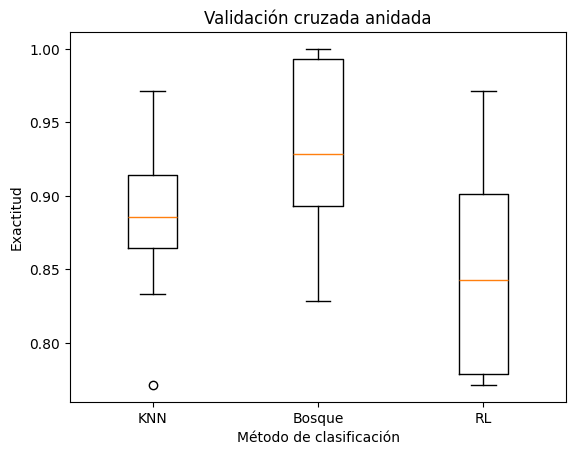

In [209]:
fig, ax = plt.subplots()

ax.boxplot([redimientosKNN, redimientosBosque, redimientosRL])

ax.set_xticklabels(["KNN", "Bosque", "RL"], fontsize=10)
ax.set_ylabel("Exactitud")
ax.set_xlabel("Método de clasificación")
ax.set_title('Validación cruzada anidada')
plt.show()

Como podemos ver, el mejor modelo será random forest.

**Apartado b**

En este apartado vamos a estudiar el rendimiento de dos hiperparámetros, para ello lo mejor es utilizar la búsqueda mediante rejilla.

In [210]:
rejilla_param = [{'n_estimators': [10, 50, 100, 200, 400],
               'max_depth': [5, 10, 15, 20, 30]}]
busqRejilla = GridSearchCV(estimator=bosque,
                  param_grid=rejilla_param,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)
busqRejilla = busqRejilla.fit(X_ent, y_ent)

print("Mejor configuración:", busqRejilla.best_params_)
print("Exactitud media de la mejor configuración: ", busqRejilla.best_score_)

Mejor configuración: {'max_depth': 5, 'n_estimators': 200}
Exactitud media de la mejor configuración:  0.9392857142857144


Dibujamos todos los rendimientos de las diferentes configuraciones probadas:

In [211]:
resultados = pd.DataFrame(busqRejilla.cv_results_)

# Ordenamos la matriz de resultados según el parámetro gamma para filas y
# C en las columnas
matriz_rendimientos = resultados.pivot(
            index="param_max_depth",
            columns="param_n_estimators",
            values="mean_test_score")
matriz_rendimientos

param_n_estimators,10,50,100,200,400
param_max_depth,,,,,
5,0.917857,0.932143,0.928571,0.939286,0.939286
10,0.925000,0.928571,0.932143,0.935714,0.935714
15,0.925000,0.932143,0.932143,0.935714,0.935714
20,0.925000,0.932143,0.932143,0.935714,0.935714
30,0.925000,0.932143,0.932143,0.935714,0.935714


Podemos ver que la mejor configuración se da con 200 árboles y profundidad 5, con una exactitud de 0.93928. Por otro lado, la peor configuración sería con 10 árboles y 5 de profundidad, con una exactitud de 0.9178.

Veámoslo con una matriz de colores:

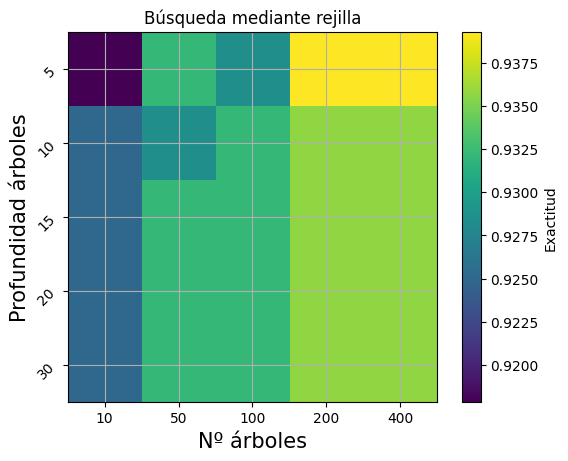

In [212]:
plt.imshow(matriz_rendimientos)
plt.yticks(ticks = np.arange(len([5, 10, 15, 20, 30])),
           labels=["{:d}".format(x) for x in [5, 10, 15, 20, 30]],
           rotation = 45)
plt.ylabel("Profundidad árboles", fontsize=15)

plt.xticks(np.arange(len([10, 50, 100, 200, 400])),
           labels=["{:d}".format(x) for x in [10, 50, 100, 200, 400]])
plt.xlabel(r"Nº árboles", fontsize=15)

plt.title('Búsqueda mediante rejilla')
plt.colorbar(label='Exactitud')
plt.grid()
plt.show()

Lo vemos ahora en 3D:

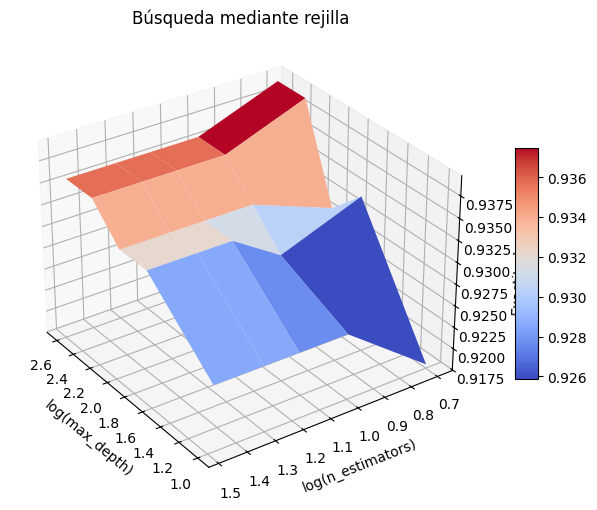

In [213]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(11, 6))

Cgrid, Ggrid = np.meshgrid([10, 50, 100, 200, 400], [5, 10, 15, 20, 30])

# Pintar la superficie
# OjO: usamos escala logarítmica en los ejes X e Y para visualizar mejor los
# resultados
surf = ax.plot_surface(np.log10(Cgrid), np.log10(Ggrid), matriz_rendimientos,
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

ax.set_title("Búsqueda mediante rejilla")
ax.set_xlabel("log(max_depth)")
ax.set_ylabel("log(n_estimators)")
ax.set_zlabel("Exactitud")
fig.colorbar(surf, shrink=0.5, aspect=10, orientation = 'vertical')

ax.view_init(None, 145)
plt.show()

Podemos ver que la exactitud es mayor cuando hay un gran número de árboles con poca profundidad.

#EJERCICIO 3

Tenemos que el peor método obtenido en el ejercicio anterior es la regresión logística.

In [214]:
#En primer lugar calculamos la mejor configuración de la regresión logística
busqRejillaRL = busqRejillaRL.fit(X_ent_std, y_ent)
print("Mejor configuración del peor método:", busqRejillaRL.best_params_)

Mejor configuración del peor método: {'C': 0.1}


In [215]:
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline

pipe_RL = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           random_state=10,
                                           solver='lbfgs',
                                           C=0.1))

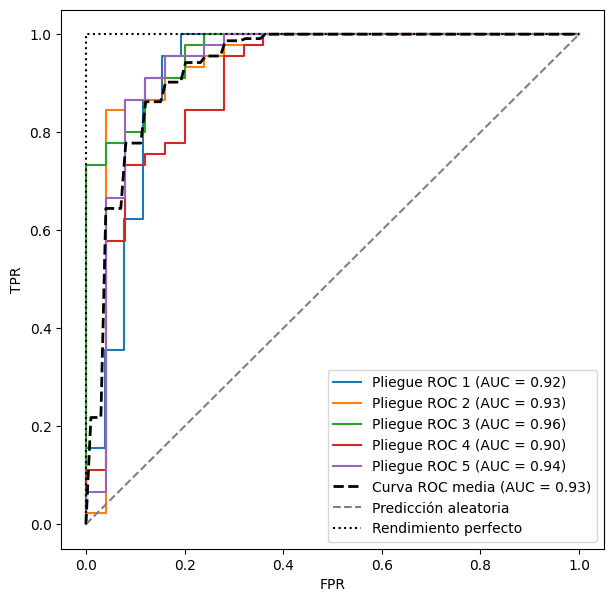

In [216]:
from sklearn.model_selection import StratifiedKFold

kPliegues = list(StratifiedKFold(n_splits=5, shuffle=True,
                          random_state=10).split(X, y))

fig = plt.figure(figsize=(7, 7))
TPR_media = 0.0
FPR_media = np.linspace(0, 1, 100)

# Dibujamos curvas ROC:
for iPliegue, (idx_ent, idx_test) in enumerate(kPliegues):
    # Ajustamos clasificador:
    pipe_RL = pipe_RL.fit(
        X[idx_ent],
        y[idx_ent])

    # Probabilidades de pertenecer a clase 1:
    probabilidades = pipe_RL.predict_proba(X[idx_test])

    # Con las probabilidades y roc_curve calculamos los diferentes puntos
    # (FPR, TPR) para diferentes umbrales:
    FPR, TPR, umbrales = roc_curve(y[idx_test],
                                     probabilidades[:, 1],
                                     pos_label=1)
    # Cáculo de área bajo la curva:
    roc_auc = auc(FPR, TPR)

    # Dibujamos curva:
    plt.plot(FPR,
             TPR,
             label='Pliegue ROC %d (AUC = %0.2f)'
             % (iPliegue+1, roc_auc))
    # Vamos estimando curva ROC media mediante cada curva ROC:
    TPR_media += np.interp(FPR_media, FPR, TPR)
    TPR_media[0] = 0.0

# Dibujamos curva ROC media:
TPR_media /= len(kPliegues)
TPR_media[-1] = 1.0
mean_auc = auc(FPR_media, TPR_media)
plt.plot(FPR_media, TPR_media, 'k--',
         label='Curva ROC media (AUC = %0.2f)' % mean_auc, lw=2)

# Dibujamos recta predicción aleatoria:
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.5, 0.5, 0.5),
         label='Predicción aleatoria')

# Dibujamos curva ROC óptima:
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Rendimiento perfecto')

# Leyenda y ajuste de márgenes:
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()

**Apartado a**

No, no llegamos a lograr un resultado perfecto en términos de TPR, ya que ninguna de las curvas ROC alcanza el punto (0, 1), que sería el resultado perfecto. Que hubiese un resultado perfecto con un TPR=1 y FPR=0 significaría que el modelo clasifica todas las muestras positivas correctamente, sin cometer ningún error. En nuestro caso se acerca mucho a la perfección, por lo que habrá pocos errores de clasificación en las muestras positivas. Como ya he dicho, los efectos de que nuestro resultado no sea perfecto en términos TPR serán que el modelo clasifique muestras positivas como negativas, es decir, habrá falsos negativos.

**Apartado b**

Sí, a diferencia de TPR, en términos de FPR se puede alcanzar la perfección mientras FPR = 0. Por tanto, podemos ver como el modelo tiene un FPR = 0 al inicio de algunas curvas ROC, lo que significaría que no hay falsos positivos. Un FPR = 0 significa que el modelo no clasifica mal ninguna muestra negativa.

**Apartado c**

Sí, ya que el área bajo la curva es mayor a 0.9, lo que significa que el modelo tiene buena capacidad para detectar positivos, luego realiza esta tarea con un alto grado de confianza.

#EJERCICIO 4

In [217]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://github.com/rubengamarro/practicas-aprendizaje-supervisado/raw/main/zoo.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


**Apartado a**

In [218]:
X = df.drop([0, 17], axis=1)  #Eliminamos las columnas no numéricas y la clase
y = df[17]

In [219]:
from sklearn.model_selection import train_test_split

X_ent, X_test, y_ent, y_test = train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=10)

**Apartado b**

In [220]:
#Calculamos la cantidad de muestras de cada clase
n_muestras = y.value_counts()
print("Cantidad de muestras por clase:\n", n_muestras)

Cantidad de muestras por clase:
 17
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


**Apartado c**

In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

arbol = DecisionTreeClassifier(max_depth=4, random_state=10)
arbol.fit(X_ent, y_ent)
y_pred = arbol.predict(X_test)
print("Puntuación F1 (macro): ", f1_score(y_true=y_test, y_pred=y_pred,
                                                 average='macro'))

Puntuación F1 (macro):  0.619047619047619


In [222]:
print("Puntuación F1 (micro): ", f1_score(y_true=y_test, y_pred=y_pred, average='micro'))

Puntuación F1 (micro):  0.8571428571428571


**Apartado d**

Las muestras de clases menos numerosas están sobrerrepresentadas en la puntuación F1 macro, ya que las medidas macro calculan la puntuación F1 para cada clase por separado y luego hace la media, teniendo todas las clases el mismo peso. Mientras que las medidad micro dan más peso a las clases con más muestras. Existe diferencia por la forma en que cada medida tiene de tratar el desbalance de clases. Esta diferencia muestra que el modelo funciona mejor en las clases con más muestras.

**Apartado e**

In [223]:
from sklearn.utils import resample
#Calculamos el número de muestras de la clase más numerosa
max_samples = n_muestras.max()

#Lista para almacenar los datos sobremuestreados
X_sobremuestreado_lista = []
y_sobremuestreado_lista = []

for clase in y.unique():
    X_clase = X[y == clase]
    y_clase = y[y == clase]

    #Sobremuestreamos la clase actual hasta que tenga el número máximo de muestras
    X_sobremuestreado, y_sobremuestreado = resample(
        X_clase,
        y_clase,
        replace=True,
        n_samples=max_samples,
        random_state=10
    )

    X_sobremuestreado_lista.append(X_sobremuestreado)
    y_sobremuestreado_lista.append(y_sobremuestreado)

#Concatenamos los datos sobremuestreados
X_sobremuestreado_cont = pd.concat(X_sobremuestreado_lista, axis=0)
y_sobremuestreado_cont = pd.concat(y_sobremuestreado_lista, axis=0)

#Mostramos la cantidad de muestras por clase después del sobremuestreo
conteo = y_sobremuestreado_cont.value_counts()
print("Cantidad de muestras por clase después del sobremuestreo:\n", conteo)

Cantidad de muestras por clase después del sobremuestreo:
 17
1    41
4    41
2    41
7    41
6    41
5    41
3    41
Name: count, dtype: int64


Como podemos ver, ahora todas las clases tienen 41 muestras.

#EJERCICIO 5

In [224]:
from sklearn.datasets import load_breast_cancer
data_breast_cancer = load_breast_cancer()
X=data_breast_cancer['data']
y=data_breast_cancer['target']

In [225]:
from sklearn.model_selection import train_test_split

X_ent, X_test, y_ent, y_test = train_test_split(X, y,
                     test_size=0.30,
                     stratify=y,
                     random_state=10)

**Apartado a**

In [226]:
#Creamos arrays y listas donde vamos a almacenar los hiperparámetros elegidos aleatoriamente y la precisión obtenida
precision_ent = np.zeros(1000)
precision_test = np.zeros(1000)
lista_min_samples_split = []
lista_min_samples_leaf = []
lista_max_features = []

In [227]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
#Entrenamos el árbol con 1000 configuraciones elegidas uniformamente al azar
for i in range(1000):
  arbol = DecisionTreeClassifier(min_samples_split=np.random.uniform(0, 1),
                                min_samples_leaf=np.random.uniform(0, 1),
                                max_features=np.random.uniform(0, 1),
                                random_state=10)
  arbol.fit(X_ent, y_ent)
  lista_min_samples_split.append(arbol.min_samples_split)
  lista_min_samples_leaf.append(arbol.min_samples_leaf)
  lista_max_features.append(arbol.max_features)
  precision_ent[i] = accuracy_score(y_ent, arbol.predict(X_ent))
  precision_test[i] = accuracy_score(y_test, arbol.predict(X_test))

En este caso, al ser 1000 configuraciones con los hiperparámetros elegidos al azar, no podemos crear matrices de rendimientos, matrices de colores y gráficos de superficies en 3D. Lo que podríamos representar en 3D son los puntos de cada configuración de hiperparámetros elegida al azar y a ese punto asignarle el color en función del rendimiento que hayan dado.

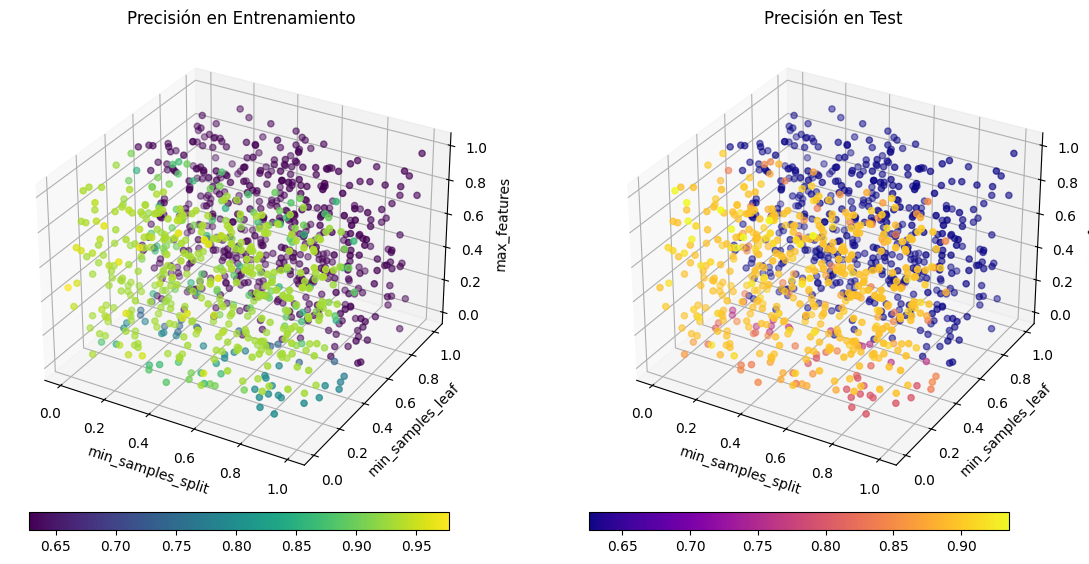

In [228]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 6))

#Gráfica de entrenamiento
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(lista_min_samples_split, lista_min_samples_leaf, lista_max_features,
                  c=precision_ent, cmap='viridis', marker='o')
ax1.set_xlabel('min_samples_split')
ax1.set_ylabel('min_samples_leaf')
ax1.set_zlabel('max_features')
ax1.set_title('Precisión en Entrenamiento')

cbar_ax1 = fig.add_axes([0.15, 0.05, 0.3, 0.03])
fig.colorbar(sc1, cax=cbar_ax1, orientation='horizontal')

#Gráfica de test
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(lista_min_samples_split, lista_min_samples_leaf, lista_max_features,
                  c=precision_test, cmap='plasma', marker='o')
ax2.set_xlabel('min_samples_split')
ax2.set_ylabel('min_samples_leaf')
ax2.set_zlabel('max_features')
ax2.set_title('Precisión en Test')

cbar_ax2 = fig.add_axes([0.55, 0.05, 0.3, 0.03])
fig.colorbar(sc2, cax=cbar_ax2, orientation='horizontal')

plt.show()

Aquí intento algo en modo superficie

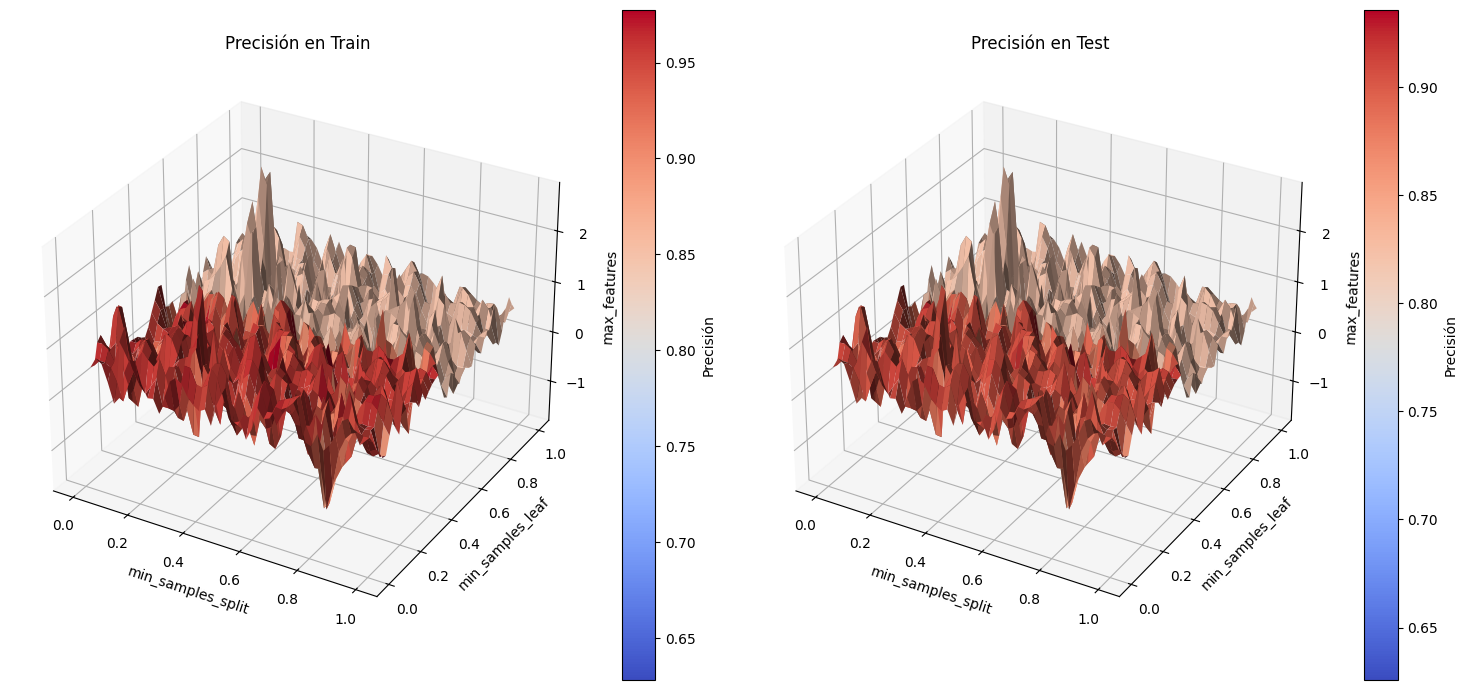

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

#Convertimos las listas a arrays
min_samples_split = np.array(lista_min_samples_split)
min_samples_leaf = np.array(lista_min_samples_leaf)
max_features = np.array(lista_max_features)

#Creamos la malla
x = np.linspace(min(min_samples_split), max(min_samples_split), 50)
y = np.linspace(min(min_samples_leaf), max(min_samples_leaf), 50)
X, Y = np.meshgrid(x, y)

#Interpolamos los valores para entrenamiento y test
Z_train = griddata((min_samples_split, min_samples_leaf), max_features,
                  (X, Y), method='cubic')
colors_train = griddata((min_samples_split, min_samples_leaf), precision_ent,
                      (X, Y), method='cubic')

Z_test = griddata((min_samples_split, min_samples_leaf), max_features,
                 (X, Y), method='cubic')
colors_test = griddata((min_samples_split, min_samples_leaf), precision_test,
                     (X, Y), method='cubic')

#Creamos la figura
fig = plt.figure(figsize=(15, 7))

#Gráfica de entrenamiento
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, Z_train, facecolors=plt.cm.coolwarm(colors_train),
                        linewidth=0, antialiased=True)
ax1.set_xlabel('min_samples_split')
ax1.set_ylabel('min_samples_leaf')
ax1.set_zlabel('max_features')
ax1.set_title('Precisión en Train')
fig.colorbar(plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=min(precision_ent), vmax=max(precision_ent))),
             ax=ax1, label='Precisión')

#Gráfica de test
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, Z_test, facecolors=plt.cm.coolwarm(colors_test),
                        linewidth=0, antialiased=True)
ax2.set_xlabel('min_samples_split')
ax2.set_ylabel('min_samples_leaf')
ax2.set_zlabel('max_features')
ax2.set_title('Precisión en Test')
fig.colorbar(plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=min(precision_test), vmax=max(precision_test))),
             ax=ax2, label='Precisión')

plt.tight_layout()
plt.show()

**Apartado b y c**

Sí, se aprecia que es sensible a los valores de los hiperparámetros pero se aprecia perfectamente que es mucho más sensibles a unos que a otros. Por ejemplo, podemos ver que el hiperparámetro max_features no influye prácticamente nada, ya que tiene precisiones altas y bajas independientemente del valor que tome. Para el hiperparámetro min_samples_split podemos ver que ocurre prácticamente lo mismo, podemos ver que tiene precisiones altas y bajas independientemente del valor que tenga, aunque en este quizá si que podemos ver que los valores más cercanos a 0 tienden a tener un poco más de precisión, por lo que quizá este hiperparámetro sí influye un poco. Por otro lado, el hiperparámetro min_samples_leaf es el que más influye en el rendimiento sin ninguna duda. Como podemos ver, hay una clara diferencia de precisión entre los valores que se acercan a 0 y los valores que se acercan a 1, siendo el modelo mucho más preciso con los valores de min_samples_leaf cercanos a 0.

#EJERCICIO 6

In [230]:
from sklearn.datasets import load_breast_cancer
data_breast_cancer = load_breast_cancer()
X=data_breast_cancer['data']
y=data_breast_cancer['target']

In [231]:
from sklearn.model_selection import train_test_split

X_ent, X_test, y_ent, y_test = train_test_split(X, y,
                     test_size=0.30,
                     stratify=y,
                     random_state=10)

**Apartado a**

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
C = np.linspace(0.01, 5, 50)
gamma = np.linspace(0.0001, 0.01, 50)
rejilla_param = [{'svc__C': C,
               'svc__gamma': gamma,
               'svc__kernel': ['rbf']}]
busqRejilla = GridSearchCV(estimator=pipe_svc,
                  param_grid=rejilla_param,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1,
                  return_train_score=True)
busqRejilla = busqRejilla.fit(X_ent, y_ent)

print("Mejor configuración:", busqRejilla.best_params_)
print("Exactitud media en entrenamiento de la mejor configuración: ", busqRejilla.best_score_)
print("Exactitud en test: ", busqRejilla.score(X_test, y_test))

Mejor configuración: {'svc__C': np.float64(4.18530612244898), 'svc__gamma': np.float64(0.008383673469387756), 'svc__kernel': 'rbf'}
Exactitud media en entrenamiento de la mejor configuración:  0.9748717948717948
Exactitud en test:  0.9707602339181286


Mapa de calor para los resultados en entrenamiento:

In [233]:
#En primer lugar creamos la matriz de resultados
resultados = pd.DataFrame(busqRejilla.cv_results_)

# Ordenamos la matriz de resultados según el parámetro gamma para filas y
# C en las columnas
matriz_rendimientos_ent = resultados.pivot(
            index="param_svc__C",
            columns="param_svc__gamma",
            values="mean_train_score")
matriz_rendimientos_ent

param_svc__gamma,0.000100,0.000302,0.000504,0.000706,0.000908,0.001110,0.001312,0.001514,0.001716,0.001918,...,0.008182,0.008384,0.008586,0.008788,0.008990,0.009192,0.009394,0.009596,0.009798,0.010000
param_svc__C,,,,,,,,,,,,,,,,,,,,,
0.010000,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141,...,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141,0.628141
0.111837,0.628141,0.628141,0.636514,0.666947,0.709379,0.770795,0.812392,0.841426,0.860968,0.874649,...,0.950306,0.950864,0.950585,0.952260,0.952260,0.952260,0.952260,0.952538,0.952538,0.952538
0.213673,0.628141,0.649360,0.740088,0.814624,0.865995,0.889165,0.903963,0.920710,0.930483,0.936626,...,0.957566,0.957287,0.957007,0.957007,0.957007,0.957007,0.957007,0.956728,0.957007,0.957007
0.315510,0.628141,0.700448,0.827466,0.881626,0.908152,0.927415,0.935510,0.944164,0.946957,0.947236,...,0.959799,0.959799,0.960078,0.960358,0.960916,0.961195,0.961195,0.960916,0.960916,0.961196
0.417347,0.630654,0.778615,0.875207,0.910663,0.930763,0.943884,0.946957,0.947516,0.950306,0.952820,...,0.961754,0.961754,0.961754,0.962032,0.962312,0.962312,0.963149,0.963708,0.964545,0.964824
0.519184,0.635399,0.826349,0.900333,0.927693,0.944722,0.946957,0.948353,0.952540,0.956169,0.957007,...,0.966221,0.966779,0.966779,0.967336,0.967895,0.969569,0.969849,0.970127,0.970128,0.970686
0.621020,0.648242,0.863202,0.918200,0.941650,0.946957,0.949469,0.952819,0.956727,0.957286,0.958682,...,0.971524,0.972362,0.972640,0.972640,0.973478,0.973478,0.973478,0.973478,0.973758,0.973758
0.722857,0.662479,0.880789,0.927413,0.946120,0.948073,0.952540,0.956727,0.958124,0.958961,0.959240,...,0.973758,0.974037,0.974037,0.974037,0.974316,0.974316,0.974316,0.974596,0.974874,0.974874
0.824694,0.674485,0.898657,0.936626,0.946678,0.951982,0.956727,0.958124,0.958961,0.959520,0.959240,...,0.974596,0.974596,0.975154,0.975433,0.975712,0.975712,0.975712,0.975712,0.975712,0.975712


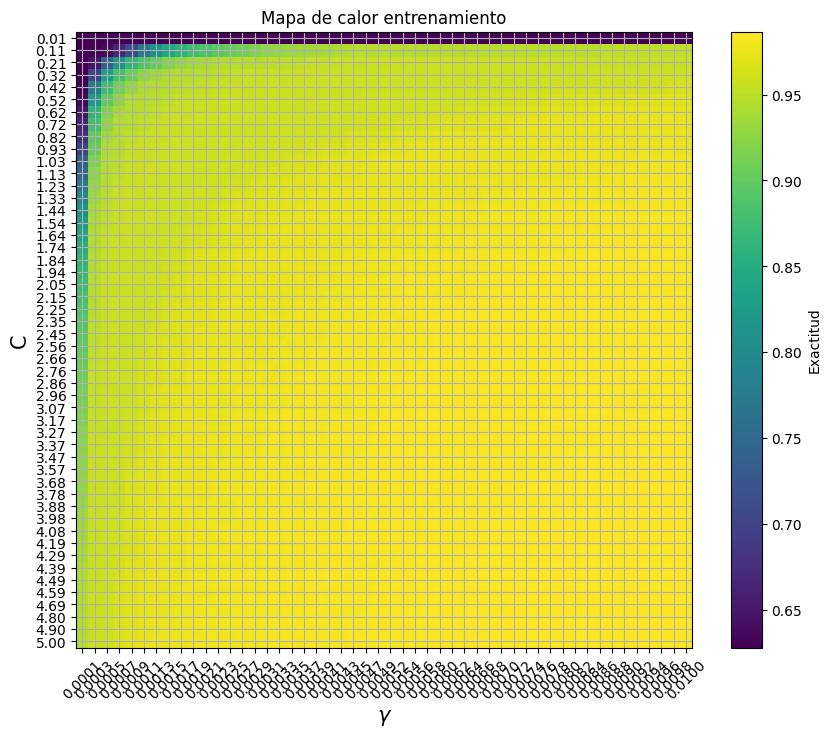

In [234]:
#Ahora creamos la matriz de colores
plt.figure(figsize=(10, 8))
plt.imshow(matriz_rendimientos_ent)
plt.xticks(ticks = np.arange(len(gamma)),
           labels=["{:.4f}".format(x) for x in gamma],
           rotation = 45)
plt.xlabel(r"$\gamma$", fontsize=15)

plt.yticks(np.arange(len(C)),
           labels=["{:.2f}".format(x) for x in C])
plt.ylabel("C", fontsize=15)

plt.title('Mapa de calor entrenamiento')
plt.colorbar(label='Exactitud')
plt.grid()
plt.show()

Mapa de calor para los resultados en test:

In [235]:
# Ordenamos la matriz de resultados según el parámetro gamma para filas y
# C en las columnas
matriz_rendimientos_test = resultados.pivot(
            index="param_svc__C",
            columns="param_svc__gamma",
            values="mean_test_score")
matriz_rendimientos_test

param_svc__gamma,0.000100,0.000302,0.000504,0.000706,0.000908,0.001110,0.001312,0.001514,0.001716,0.001918,...,0.008182,0.008384,0.008586,0.008788,0.008990,0.009192,0.009394,0.009596,0.009798,0.010000
param_svc__C,,,,,,,,,,,,,,,,,,,,,
0.010000,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205,...,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205,0.628205
0.111837,0.628205,0.628205,0.640705,0.668526,0.706218,0.768846,0.813910,0.836538,0.861731,0.871859,...,0.947115,0.949615,0.949615,0.949615,0.949615,0.947115,0.949615,0.949615,0.949615,0.949615
0.213673,0.628205,0.650897,0.738782,0.813910,0.866795,0.886923,0.907051,0.912115,0.919615,0.932244,...,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679
0.315510,0.628205,0.703654,0.824038,0.879423,0.907051,0.917115,0.929744,0.942179,0.944744,0.944744,...,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679,0.954679
0.417347,0.630705,0.776410,0.869359,0.907051,0.927244,0.942179,0.944744,0.947244,0.947244,0.947244,...,0.957244,0.957244,0.957244,0.957244,0.957244,0.957244,0.957244,0.957244,0.957244,0.957244
0.519184,0.635705,0.821474,0.894423,0.924679,0.944744,0.944744,0.947244,0.947244,0.949744,0.949744,...,0.957244,0.957244,0.959808,0.959808,0.959808,0.959808,0.959808,0.959808,0.962372,0.959808
0.621020,0.648333,0.864295,0.912115,0.937179,0.944744,0.947244,0.947244,0.949744,0.949744,0.954808,...,0.962372,0.962372,0.962372,0.964872,0.967372,0.967372,0.969872,0.969872,0.969872,0.969872
0.722857,0.660962,0.879423,0.924679,0.944744,0.947244,0.947244,0.949744,0.949744,0.954808,0.954808,...,0.964808,0.964808,0.964808,0.964808,0.967372,0.967372,0.967372,0.967372,0.969872,0.972372
0.824694,0.676026,0.894423,0.929679,0.944744,0.947244,0.949744,0.949744,0.954808,0.954808,0.954808,...,0.964808,0.964808,0.964808,0.964808,0.964808,0.964808,0.964808,0.964808,0.964808,0.964808


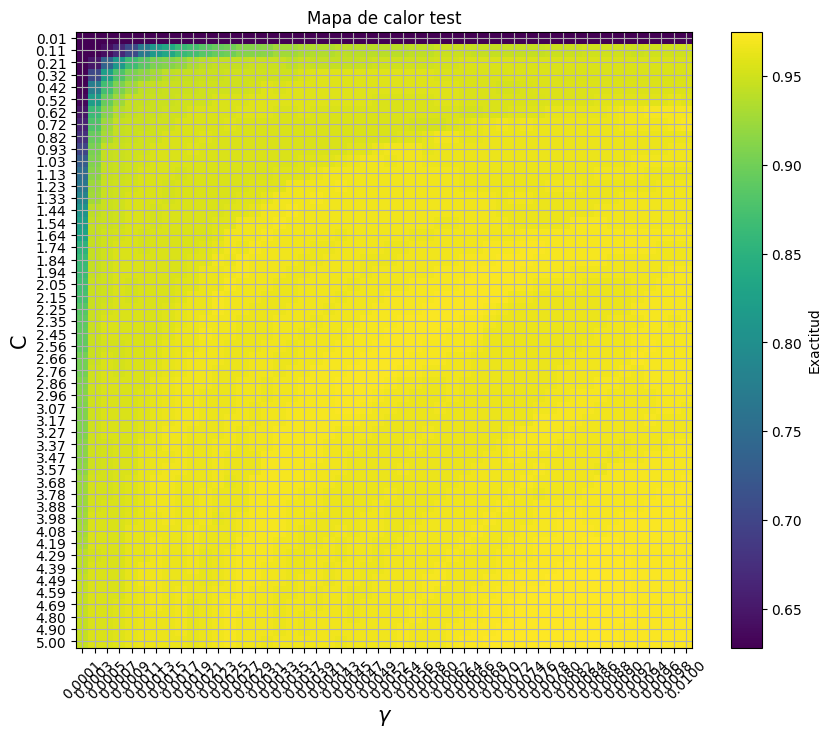

In [236]:
#Ahora creamos la matriz de colores
plt.figure(figsize=(10, 8))
plt.imshow(matriz_rendimientos_test)
plt.xticks(ticks = np.arange(len(gamma)),
           labels=["{:.4f}".format(x) for x in gamma],
           rotation = 45)
plt.xlabel(r"$\gamma$", fontsize=15)

plt.yticks(np.arange(len(C)),
           labels=["{:.2f}".format(x) for x in C])
plt.ylabel("C", fontsize=15)

plt.title('Mapa de calor test')
plt.colorbar(label='Exactitud')
plt.grid()
plt.show()

**Apartado b**

Sí, podemos apreciar que cuando los valores de C tienden a 0 la precisión disminuye y cuando tienden a 5 la precisión aumenta. Lo mismo pasa con gamma, cuando tiende a 0.0001 disminuye y cuando tiende a 0.01 aumenta. Esto nos confirma nuestro resultado anterior, que la mejor configuración de parámetros para tener mejor exactitud se consigue con valores 'altos' de C y gamma.

**Apartado c**

Repetimos el apartado a) pero en una región con alta precisión.

In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
C = np.linspace(4, 5, 50)
gamma = np.linspace(0.005, 0.01, 50)
rejilla_param = [{'svc__C': C,
               'svc__gamma': gamma,
               'svc__kernel': ['rbf']}]
busqRejilla = GridSearchCV(estimator=pipe_svc,
                  param_grid=rejilla_param,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1,
                  return_train_score=True)
busqRejilla = busqRejilla.fit(X_ent, y_ent)

print("Mejor configuración:", busqRejilla.best_params_)
print("Exactitud media en entrenamiento de la mejor configuración: ", busqRejilla.best_score_)
print("Exactitud en test: ", busqRejilla.score(X_test, y_test))

Mejor configuración: {'svc__C': np.float64(4.122448979591836), 'svc__gamma': np.float64(0.008571428571428572), 'svc__kernel': 'rbf'}
Exactitud media en entrenamiento de la mejor configuración:  0.9748717948717948
Exactitud en test:  0.9707602339181286


Mapa de calor para los resultados en entrenamiento:

In [238]:
#En primer lugar creamos la matriz de resultados
resultados = pd.DataFrame(busqRejilla.cv_results_)

# Ordenamos la matriz de resultados según el parámetro gamma para filas y
# C en las columnas
matriz_rendimientos_ent = resultados.pivot(
            index="param_svc__C",
            columns="param_svc__gamma",
            values="mean_train_score")
matriz_rendimientos_ent

param_svc__gamma,0.005000,0.005102,0.005204,0.005306,0.005408,0.005510,0.005612,0.005714,0.005816,0.005918,...,0.009082,0.009184,0.009286,0.009388,0.009490,0.009592,0.009694,0.009796,0.009898,0.010000
param_svc__C,,,,,,,,,,,,,,,,,,,,,
4.000000,0.982412,0.982412,0.982412,0.982691,0.982412,0.982412,0.982132,0.982412,0.982970,0.983250,...,0.985762,0.985762,0.985762,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041
4.020408,0.982691,0.982412,0.982412,0.982691,0.982412,0.982412,0.982132,0.982691,0.982692,0.983250,...,0.985762,0.985762,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041
4.040816,0.982691,0.982412,0.982412,0.982412,0.982412,0.982412,0.982132,0.982970,0.982970,0.983250,...,0.985762,0.985762,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041
4.061224,0.982412,0.982412,0.982691,0.982412,0.982412,0.982132,0.982132,0.982970,0.983250,0.983250,...,0.985762,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.985762
4.081633,0.982412,0.982412,0.982412,0.982412,0.982412,0.982132,0.982691,0.982692,0.983250,0.982970,...,0.985762,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.985762
4.102041,0.982412,0.982412,0.982412,0.982412,0.982412,0.982412,0.982970,0.982971,0.983250,0.982970,...,0.985762,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.985762,0.985762
4.122449,0.982412,0.982412,0.982412,0.982412,0.982412,0.982412,0.983250,0.983250,0.982970,0.982691,...,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.985762,0.985762,0.985762
4.142857,0.982412,0.982691,0.982412,0.982412,0.982412,0.982970,0.982971,0.983529,0.982970,0.982691,...,0.986041,0.986041,0.986041,0.986041,0.986041,0.986041,0.985762,0.985762,0.985762,0.985762
4.163265,0.982412,0.982412,0.982412,0.982412,0.982412,0.983250,0.982971,0.983250,0.982970,0.982691,...,0.986041,0.986041,0.986041,0.986041,0.986041,0.985762,0.985762,0.985762,0.985762,0.985762


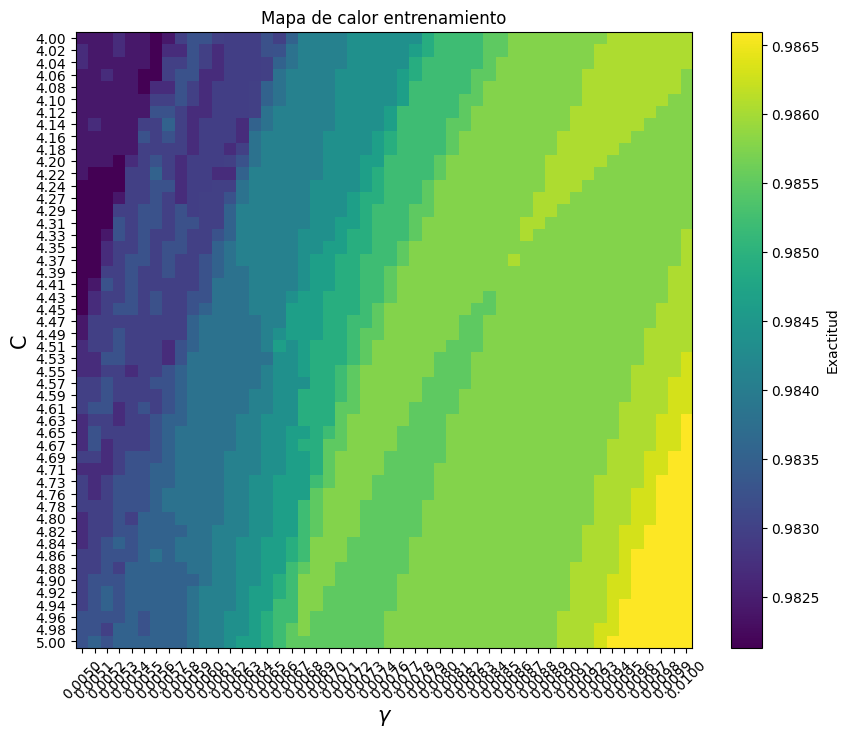

In [239]:
#Ahora creamos la matriz de colores
plt.figure(figsize=(10, 8))
plt.imshow(matriz_rendimientos_ent)
plt.xticks(ticks = np.arange(len(gamma)),
           labels=["{:.4f}".format(x) for x in gamma],
           rotation = 45)
plt.xlabel(r"$\gamma$", fontsize=15)

plt.yticks(np.arange(len(C)),
           labels=["{:.2f}".format(x) for x in C])
plt.ylabel("C", fontsize=15)

plt.title('Mapa de calor entrenamiento')
plt.colorbar(label='Exactitud')
#plt.grid()
plt.show()

Mapa de calor para los resultados en test:

In [240]:
# Ordenamos la matriz de resultados según el parámetro gamma para filas y
# C en las columnas
matriz_rendimientos_test = resultados.pivot(
            index="param_svc__C",
            columns="param_svc__gamma",
            values="mean_test_score")
matriz_rendimientos_test

param_svc__gamma,0.005000,0.005102,0.005204,0.005306,0.005408,0.005510,0.005612,0.005714,0.005816,0.005918,...,0.009082,0.009184,0.009286,0.009388,0.009490,0.009592,0.009694,0.009796,0.009898,0.010000
param_svc__C,,,,,,,,,,,,,,,,,,,,,
4.000000,0.967436,0.964872,0.964872,0.964872,0.964872,0.964872,0.967372,0.967372,0.967372,0.967372,...,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308
4.020408,0.967436,0.964872,0.964872,0.964872,0.964872,0.964872,0.967372,0.967372,0.967372,0.967372,...,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308
4.040816,0.967436,0.964872,0.964872,0.964872,0.964872,0.967372,0.967372,0.967372,0.967372,0.967372,...,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308
4.061224,0.964872,0.964872,0.964872,0.964872,0.964872,0.967372,0.967372,0.967372,0.967372,0.967372,...,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308
4.081633,0.964872,0.964872,0.964872,0.964872,0.964872,0.967372,0.967372,0.967372,0.967372,0.967372,...,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308
4.102041,0.964872,0.964872,0.964872,0.964872,0.967372,0.967372,0.967372,0.967372,0.967372,0.967372,...,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308
4.122449,0.964872,0.964872,0.964872,0.964872,0.967372,0.967372,0.967372,0.967372,0.967372,0.967372,...,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308
4.142857,0.964872,0.964872,0.964872,0.964872,0.967372,0.967372,0.967372,0.967372,0.967372,0.967372,...,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308
4.163265,0.964872,0.964872,0.964872,0.967372,0.967372,0.967372,0.967372,0.967372,0.967372,0.967372,...,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308,0.972308


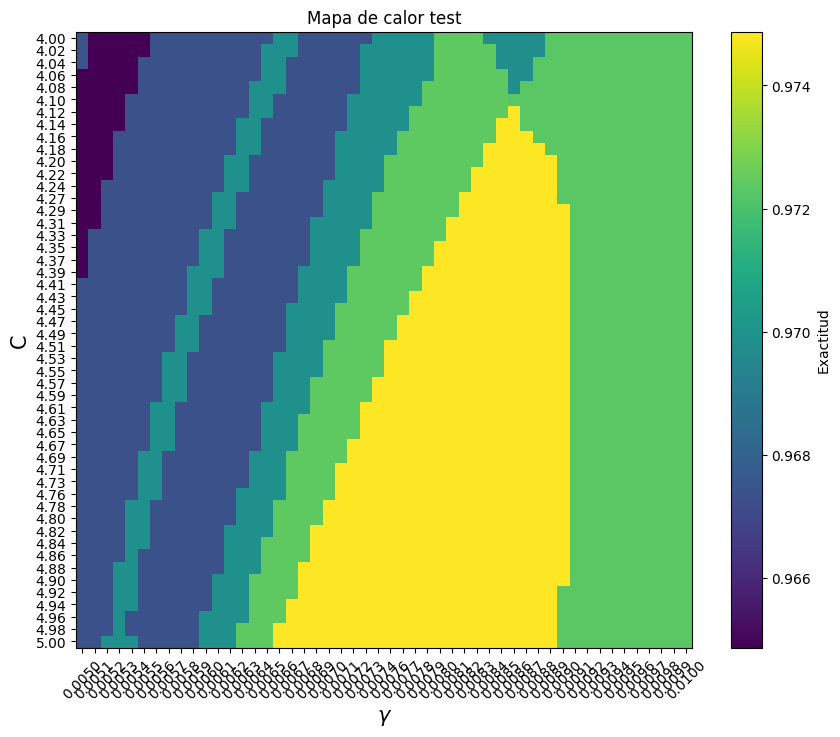

In [241]:
#Ahora creamos la matriz de colores
plt.figure(figsize=(10, 8))
plt.imshow(matriz_rendimientos_test)
plt.xticks(ticks = np.arange(len(gamma)),
           labels=["{:.4f}".format(x) for x in gamma],
           rotation = 45)
plt.xlabel(r"$\gamma$", fontsize=15)

plt.yticks(np.arange(len(C)),
           labels=["{:.2f}".format(x) for x in C])
plt.ylabel("C", fontsize=15)

plt.title('Mapa de calor test')
plt.colorbar(label='Exactitud')
#plt.grid()
plt.show()

**Apartado d**

En este mapa aumentado, podemos ver con más claridad lo que ya afirmamos anteriormente. En el mapa de entrenamiento podemos ver como con el aumento de C y con el aumento de gamma aumenta la precisión. Sin embargo, para el mapa de test, aunque sigue la misma tendencia de aumentar la precision al aumentar los hiperparámetros, si que podemos ver como disminuye un poco la precisión al acercarse a gamma=0.01, encontrándose los puntos con más precisión con un valor un poco más pequeño de gamma. Por lo general, podemos ver estabilidad en los resultados.